# Dry parcel-model integrated in dry atmosphere

As a simply example this notebook demonstrates the integration of the dry parcel-model (so no microphysics) in an atmopshere with no moisture.

In [1]:
import numpy as np   
import matplotlib.pyplot as plt
import pyclouds

%matplotlib inline

In [2]:
pyclouds.__version__

'v0.2.0+6.gd849250.dirty'

In [3]:
from pyclouds.models import parcel as parcel_models
from pyclouds.reference.atmos import stratification_profiles
from pyclouds.reference import constants as reference_constants
from pyclouds import Var

# Dry parcel model

We use the ambient state profile based on [Soong et al 1973](https://doi.org/10.1175/1520-0469(1973)030%3C0879:ACBAAS%3E2.0.CO;2) (without water vapour) starting with a rising parcel slightly warmer (and so lighter) than its environment

In [4]:
# Ambient state
ambient_stratification = stratification_profiles.Soong1973Dry()

In [5]:
z_points = np.linspace(100., 4e3, 500)
T_e = lambda z: ambient_stratification.temp(z)

z0 = z_points[0]
r0 = 500.0
w0 = 0.1
T0 = T_e(z0) + 0.2
p0 = ambient_stratification.p(z0)

initial_condition = Var.make_state(r=r0, w=w0, T=T0, p=p0)

In [6]:
cloud_model = parcel_models.DryAirOnly(
    environment=ambient_stratification, constants=reference_constants.default_constants,
    C_D=2.
)

profile = cloud_model.integrate(initial_condition, z_points)

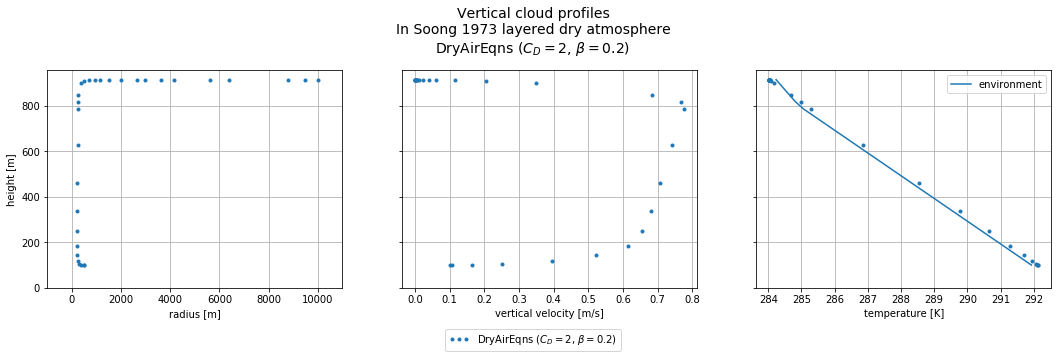

In [7]:
plot = profile.plot(variables=["r", "w", "T",])